9-1. 프로젝트: CAM을 만들고 평가해 보자


#### 라이브러리 버전 확인하기
---
사용할 라이브러리 버전을 확인해봐요.

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import PIL

print(tf.__version__)
print(np.__version__)
print(cv2.__version__)
print(PIL.__version__)

2.6.0
1.21.4
4.5.3
8.3.2


슝=3
슝=3


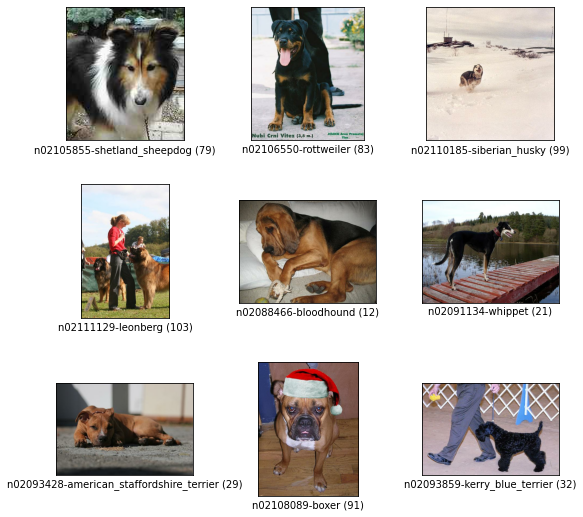

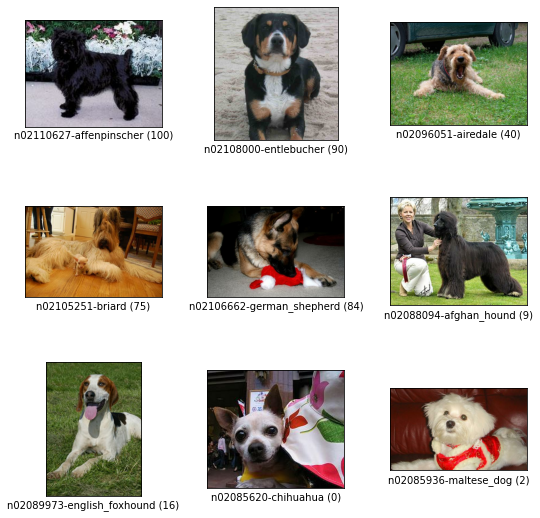

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

(16, 224, 224, 3)
(16,)
슝=3
Epoch 1/2
750/750 [==============================] - 231s 220ms/step - loss: 2.2579 - accuracy: 0.4335 - val_loss: 3.2467 - val_accuracy: 0.2196
Epoch 2/2
750/750 [==============================] - 171s 228ms/step - loss: 0.6302 - accuracy: 0.8360 - val_loss: 1.2579 - val_accuracy: 0.6301


/opt/conda/lib/python3.9/site-packages/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [2]:
# # 데이터셋 준비 및 CAM 모델 만들고 학습 (한번 진행하면 넘겨)

# # TensorFlow and tf.keras
# import tensorflow as tf
# from tensorflow import keras

# # Helper libraries
# import numpy as np
# import matplotlib.pyplot as plt

# import tensorflow_datasets as tfds

# import copy
# import cv2
# from PIL import Image

# print('슝=3')

# tf.config.list_physical_devices('GPU')

# # 최초 수행시에는 다운로드가 진행됩니다. 오래 걸릴 수 있으니 유의해 주세요.  
# (ds_train, ds_test), ds_info = tfds.load(
#     'stanford_dogs',
#     split=['train', 'test'],
#     shuffle_files=True,
#     with_info=True,
# )
# print('슝=3')

# tfds.show_examples(ds_train, ds_info) 

# tfds.show_examples(ds_test, ds_info)

# ds_info.features

# num_classes = ds_info.features["label"].num_classes
# base_model = keras.applications.resnet50.ResNet50(
#     include_top=False,    # Imagenet 분류기  fully connected layer 제거
#     weights='imagenet',
#     input_shape=(224, 224, 3),
#     pooling='avg',      # GAP를 적용  
# )
# x = base_model.output
# preds = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(x)# preds = ADD_YOUR_DENSE_LAYER(x)
# cam_model = keras.Model(inputs=base_model.input, outputs=preds)

# cam_model.summary()

# def normalize_and_resize_img(input):
#     # Normalizes images: `uint8` -> `float32`
#     image = tf.image.resize(input['image'], [224, 224])
#     input['image'] = tf.cast(image, tf.float32) / 255.
#     return input['image'], input['label']

# def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
#     ds = ds.map(
#         normalize_and_resize_img, 
#         num_parallel_calls=2
#     )
#     ds = ds.batch(batch_size)
#     '''
#     if not is_test:
#         ds = ds.repeat()
#         ds = ds.shuffle(200)
#     '''
#     ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
#     return ds

# print('슝=3')

# def normalize_and_resize_img(input):
#     # Normalizes images: `uint8` -> `float32`
#     image = tf.image.resize(input['image'], [224, 224])
#     input['image'] = tf.cast(image, tf.float32) / 255.
#     return input['image'], input['label']

# def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
#     ds = ds.map(
#         normalize_and_resize_img, 
#         num_parallel_calls=2
#     )
#     ds = ds.batch(batch_size)
#     '''
#     if not is_test:
#         ds = ds.repeat()
#         ds = ds.shuffle(200)
#     '''
#     ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
#     return ds

# print('슝=3')

# # 데이터셋에 전처리와 배치처리를 적용합니다.
# ds_train_norm = apply_normalize_on_dataset(ds_train)
# ds_val_norm = apply_normalize_on_dataset(ds_test)

# # 구성된 배치의 모양을 확인해 봅니다. 
# for input in ds_train_norm.take(1):
#     image, label = input
#     print(image.shape)
#     print(label.shape)
    
#     cam_model.compile(
#     loss='sparse_categorical_crossentropy',
#     optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
#     metrics=['accuracy'],
# )

# print('슝=3')

# history_cam_model = cam_model.fit(
#     ds_train_norm,
#     steps_per_epoch=int(ds_info.splits['train'].num_examples/16),
#     validation_steps=int(ds_info.splits['test'].num_examples/16),
#     epochs=2,
#     validation_data=ds_val_norm,
#     verbose=1,
#     use_multiprocessing=True,
# )

# # Q. '/aiffel/class_activation_map' 에 'cam_model1.h5'을 저장하세요.

# import os
# # 저장 경로 설정
# cam_model_path = os.path.join('/aiffel/class_activation_map', 'cam_model1.h5')# [[YOUR CODE]]

# # 디렉토리가 존재하는지 확인하고, 없으면 생성
# os.makedirs(os.path.dirname(cam_model_path), exist_ok=True)

# # 모델 저장
# cam_model.save(cam_model_path)# [[YOUR CODE]]

슝=3
슝=3
116


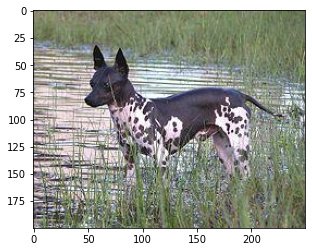

슝=3


In [2]:
# 커널 재시작 이후 실습을 위해, 이전 스텝의 코드를 모아서 한꺼번에 실행합니다.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import copy
import cv2
from PIL import Image

(ds_train, ds_test), ds_info = tfds.load(
    'stanford_dogs',
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)

def normalize_and_resize_img(input):
    # Normalizes images: `uint8` -> `float32`
    image = tf.image.resize(input['image'], [224, 224])
    input['image'] = tf.cast(image, tf.float32) / 255.
    return input['image'], input['label']

def apply_normalize_on_dataset(ds, is_test=False, batch_size=16):
    ds = ds.map(
        normalize_and_resize_img, 
        num_parallel_calls=2
    )
    ds = ds.batch(batch_size)
    '''
    if not is_test:
        ds = ds.repeat()
        ds = ds.shuffle(200)
    '''
    ds = ds.prefetch(tf.data.experimental.AUTOTUNE)
    return ds

print('슝=3')

# 이제 학습된 모델에서 CAM을 생성

def get_one(ds):
    ds = ds.take(1)
    sample_data = list(ds.as_numpy_iterator())
    bbox = sample_data[0]['objects']['bbox']
    image = sample_data[0]['image']
    label = sample_data[0]['label']
    return sample_data[0]

print('슝=3')

item = get_one(ds_test)
print(item['label'])
plt.imshow(item['image'])
plt.show()

import os
cam_model_path = os.getenv('HOME')+'/aiffel/class_activation_map/cam_model.h5'
cam_model = tf.keras.models.load_model(cam_model_path)
print('슝=3')

#### CAM 구현하기
---
1. 이번 노드에 나왔던 CAM을 직접 구현해 봅시다. 예제 코드를 최대한 보지 말고, 설명과 이론을 보고 구현해 보세요.
```
def generate_cam(model, item):
    cam_image = None
    # TODO: generate cam image
    return cam_image
```
2. 만든 함수로 CAM 이미지를 생성합시다.
```
cam_image = generate_cam(cam_model, item)
plt.imshow(cam_image)
```
3. 원본 이미지와 CAM 이미지를 입력으로 받고 두 개의 이미지의 투명도를 조정, 하나의 이미지에서 원본과 CAM을 겹쳐 보여주는 ```visualize_cam_on_image()``` 함수를 만들어보세요.
- [webnautes님의 OpenCV Python 강좌 - 두 개의 이미지 더하기, 블렌딩](https://webnautes.tistory.com/1245)

```
def visualize_cam_on_image(image, cam_image):
    # TODO: blend image
    merged_image = None
    return merged_image
```
```
# visualize_cam_on_image() 함수 사용

type(item['image'].numpy())

origin_image = item['image'].numpy().astype(np.uint8)
cam_image_3channel = np.stack([cam_image*255]*3, axis=-1).astype(np.uint8)

blended_image = visualize_cam_on_image(cam_image_3channel, origin_image)
plt.imshow(blended_image)
```

In [3]:
def generate_cam(model, item):
    """
    이 함수는 모델이 이미지의 어떤 부분을 보고 결정을 내렸는지 시각화합니다.

    특징:
    - 모델 예측 클래스 사용 (모델 해석에 적합)
    - 'conv5_block3_out' 레이어를 직접 이름으로 접근 (간결하고 안정적)
    - ReLU 적용 및 0 나눗셈 방지
    - 원본 이미지 크기로 출력
    """
    # 원본 데이터 보존을 위한 깊은 복사 
    item = copy.deepcopy(item)
    
    # 원본 이미지 크기 저장
    original_height = item['image'].shape[0]
    original_width = item['image'].shape[1]
    
    # 기존 함수를 사용해 이미지 전처리 및 크기 조정
    img_tensor, _ = normalize_and_resize_img(item)
    img_array = tf.expand_dims(img_tensor, 0)
    
    # 모델 예측 및 가장 높은 확률의 클래스 인덱스 구하기
    preds = model.predict(img_array)
    class_idx = np.argmax(preds[0])
    
    # 'conv5_block3_out' 레이어 직접 접근 (get_layer 메서드 사용)
    last_conv_layer = model.get_layer('conv5_block3_out')
    
    # 합성곱 레이어의 출력을 가져오기 위한 모델 생성
    feature_model = tf.keras.Model(inputs=model.input, outputs=last_conv_layer.output)
    
    # 합성곱 레이어의 출력(feature map) 가져오기
    feature_maps = feature_model.predict(img_array)
    feature_maps = feature_maps[0]  # 배치 차원 제거
    
    # 마지막 Dense 레이어의 가중치 가져오기
    class_weights = model.layers[-1].get_weights()[0]
    
    # CAM 계산
    cam = np.zeros(dtype=np.float32, shape=feature_maps.shape[0:2])
    
    # 예측된 클래스에 대한 가중치 적용
    for i, w in enumerate(class_weights[:, class_idx]):
        cam += w * feature_maps[:, :, i]
    
    # ReLU 적용 (음수 값 제거)
    cam = np.maximum(cam, 0)
    
    # 원본 이미지 크기로 리사이즈 및 정규화
    cam = cv2.resize(cam, (original_width, original_height))
    cam = cam / np.max(cam) if np.max(cam) > 0 else cam  # 0으로 나누기 방지
    
    return cam

def visualize_cam_on_image(cam_image, image, alpha=0.5):
    """
    이 함수는 CAM 이미지와 원본 이미지를 블렌딩하여 모델의 관심 영역을 시각화합니다.
    특징:
    - 의미가 명확한 매개변수 이름 사용 (cam_image, image)
    - 이미지 크기 일치 검증 (assert 문으로 안전성 확보)
    - 직접 1-alpha 값 사용 (별도 베타 변수 선언 없음)
    - OpenCV의 addWeighted에 정수 감마값(0) 전달
    """
    """
    CAM 이미지와 원본 이미지를 블렌딩하여 하나의 이미지로 표시합니다.
    
    Args:
        cam_image: CAM 이미지 (shape: [height, width, 3], dtype: uint8)
        image: 원본 이미지 (shape: [height, width, 3], dtype: uint8)
        alpha: 블렌딩 비율 (0.0 ~ 1.0)
    
    Returns:
        merged_image: 블렌딩된 이미지 (shape: [height, width, 3], dtype: uint8)
    """
    # 이미지 크기 확인
    assert cam_image.shape == image.shape, "두 이미지의 크기가 일치해야 합니다."
    
    # OpenCV의 addWeighted 함수로 이미지 블렌딩
    # cam_image에 alpha 가중치를, image에 (1-alpha) 가중치를 적용
    merged_image = cv2.addWeighted(cam_image, alpha, image, 1-alpha, 0)
    
    return merged_image
# def generate_cam(model, item):
#     item = copy.deepcopy(item)
#     width = item['image'].shape[1]
#     height = item['image'].shape[0]
    
#     img_tensor, class_idx = normalize_and_resize_img(item)
    
#     # 학습한 모델에서 원하는 Layer의 output을 얻기 위해서 모델의 input과 output을 새롭게 정의해줍니다.
#     cam_model = tf.keras.models.Model([model.inputs], [model.layers[-3].output, model.output])
#     conv_outputs, predictions = cam_model(tf.expand_dims(img_tensor, 0))
#     conv_outputs = conv_outputs[0, :, :, :]
    
#     # 모델의 weight activation은 마지막 layer에 있습니다.
#     class_weights = model.layers[-1].get_weights()[0] 
    
#     cam_image = np.zeros(dtype=np.float32, shape=conv_outputs.shape[0:2])
#     for i, w in enumerate(class_weights[:, class_idx]):
#         # conv_outputs의 i번째 채널과 i번째 weight를 곱해서 누적하면 활성화된 정도가 나타날 겁니다.
#         cam_image += w * conv_outputs[:, :, i]

#     cam_image /= np.max(cam_image) # activation score를 normalize합니다.
#     cam_image = cam_image.numpy()
#     cam_image = cv2.resize(cam_image, (width, height)) # 원래 이미지의 크기로 resize합니다.
#     return cam_image

# print('슝=3')

# def visualize_cam_on_image(src1, src2, alpha=0.5):
#     beta = (1.0 - alpha)
#     merged_image = cv2.addWeighted(src1, alpha, src2, beta, 0.0)
#     return merged_image

# print('슝=3')

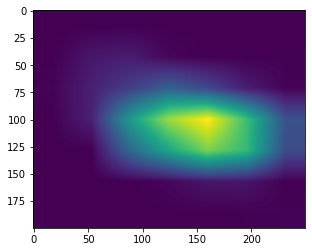

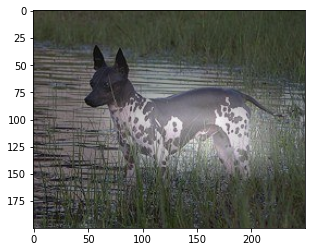

In [4]:
cam_image = generate_cam(cam_model, item)
plt.imshow(cam_image)
plt.show()

origin_image = item['image'].astype(np.uint8)
cam_image_3channel = np.stack([cam_image*255]*3, axis=-1).astype(np.uint8)

blended_image = visualize_cam_on_image(cam_image_3channel, origin_image)
plt.imshow(blended_image)
plt.show()

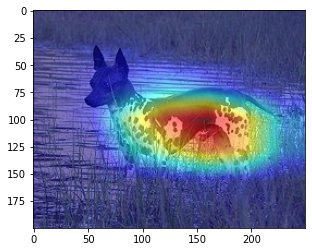

In [5]:
def visualize_cam_on_image(cam_image, image, alpha=0.5):
    """
    이 함수는 CAM 이미지와 원본 이미지를 블렌딩하여 모델의 관심 영역을 시각화합니다.
    특징:
    - 의미가 명확한 매개변수 이름 사용 (cam_image, image)
    - 이미지 크기 일치 검증 (assert 문으로 안전성 확보)
    - 직접 1-alpha 값 사용 (별도 베타 변수 선언 없음)
    - OpenCV의 addWeighted에 정수 감마값(0) 전달
    - 히트맵 컬러링 적용으로 중요도 시각화 개선
    """
    # 이미지 크기 확인
    assert cam_image.shape[:2] == image.shape[:2], "두 이미지의 크기가 일치해야 합니다."
    
    # 히트맵에 컬러맵 적용 (grayscale 형태로 변환 후 컬러맵 적용)
    if cam_image.ndim == 3:  # 3채널 입력인 경우
        # 회색조로 변환 (RGB 채널의 평균)
        grayscale_cam = np.mean(cam_image, axis=2)
    else:  # 이미 그레이스케일인 경우
        grayscale_cam = cam_image
    
    # 정규화 (0-1 범위로)
    normalized_cam = grayscale_cam / 255.0 if grayscale_cam.max() > 1.0 else grayscale_cam
    
    # 컬러맵 적용 (jet 컬러맵 사용) - 값을 반전시켜 표준 히트맵 색상 적용
    colored_cam = cv2.applyColorMap(((1 - normalized_cam) * 255).astype(np.uint8), cv2.COLORMAP_JET)
    
    # 원본 이미지와 히트맵 블렌딩
    merged_image = cv2.addWeighted(colored_cam, alpha, image, 1-alpha, 0)
    
    return merged_image

origin_image = item['image'].astype(np.uint8)
cam_image_3channel = np.stack([cam_image*255]*3, axis=-1).astype(np.uint8)

blended_image = visualize_cam_on_image(cam_image_3channel, origin_image)
plt.imshow(blended_image)
plt.show()

100


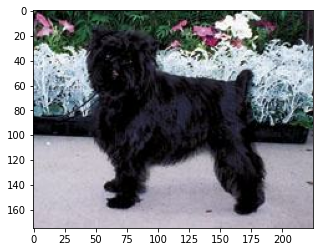

In [6]:
item = get_one(ds_test)
print(item['label'])
plt.imshow(item['image'])
plt.show()

#### Grad-CAM 구현하기
---
1. 이번 노드에 나왔던 Grad-CAM을 직접 구현해 봅시다. 예제 코드를 최대한 보지 말고, 설명과 이론을 보고 구현해 보세요.
```
def generate_grad_cam(model, activation_layer, item):
    grad_cam_image = None
    # TODO: generate grad_cam_image

    return grad_cam_image
```
2. 만든 함수로 여러 레이어의 CAM 이미지를 뽑아서 직접 확인해 보세요.
3. 위에서 만든 이미지 ```visualize_cam_on_image()``` 함수로 이미지를 시각화해 보세요.

In [7]:
def generate_grad_cam(model, activation_layer, item):
    """
    Grad-CAM을 생성하여 모델의 의사결정 영역을 시각화하는 함수입니다.

    주요 특징:
    - 모델 예측 클래스 사용 (모델이 실제로 본 것 시각화)
    - TensorFlow 연산 활용 (GPU 가속 가능)
    - 명확한 변수명과 배치 처리
    - 안전장치 포함 (0으로 나누기 방지)
    - TensorFlow 이미지 리사이징 사용 (OpenCV 대신)

    Parameters:
    model: 학습된 CNN 모델
    activation_layer: 활성화 맵 추출 레이어 이름
    item: 'image' 키를 포함한 입력 데이터

    Returns:
    활성화 맵 (0-1 범위, 원본 이미지 크기)
    """
    """
    Grad-CAM을 생성하여 모델이 이미지의 어떤 부분을 보고 결정을 내렸는지 시각화합니다.
    
    Args:
        model: 학습된 CNN 모델
        activation_layer: 활성화 맵을 추출할 레이어 이름
        item: 입력 이미지를 포함하는 딕셔너리
        
    Returns:
        grad_cam_image: 생성된 Grad-CAM 이미지 (0-1 범위의 float32)
    """
    # 원본 이미지 크기 저장
    item = copy.deepcopy(item)
    original_height = item['image'].shape[0]
    original_width = item['image'].shape[1]
    
    # 이미지 전처리
    img_tensor, _ = normalize_and_resize_img(item)
    img_tensor = tf.expand_dims(img_tensor, 0)
    
    # 지정된 레이어 가져오기
    grad_model = tf.keras.models.Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(activation_layer).output, model.output]
    )
    
    # GradientTape 사용하여 그래디언트 계산
    with tf.GradientTape() as tape:
        # 활성화 맵과 예측값
        conv_outputs, predictions = grad_model(img_tensor)
        # 가장 높은 확률의 클래스
        class_idx = tf.argmax(predictions[0])
        # 타겟 클래스의 점수
        score = predictions[:, class_idx]
        
    # 활성화 맵에 대한 그래디언트 계산
    grads = tape.gradient(score, conv_outputs)
    
    # 전역 평균 풀링을 통한 각 필터의 중요도 계산
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # 활성화 맵과 가중치 곱하기
    conv_outputs = conv_outputs[0]
    grad_cam = tf.zeros(shape=conv_outputs.shape[0:2], dtype=tf.float32)
    
    # 가중 합 계산
    for i, w in enumerate(pooled_grads):
        grad_cam += w * conv_outputs[:, :, i]
    
    # ReLU 적용
    grad_cam = tf.maximum(grad_cam, 0)
    
    # 정규화 및 리사이징
    grad_cam = grad_cam / tf.maximum(tf.reduce_max(grad_cam), 1e-10)
    grad_cam = tf.image.resize(tf.expand_dims(grad_cam, -1), [original_height, original_width])
    
    return grad_cam.numpy()[:, :, 0]
# def generate_grad_cam(model, activation_layer, item):
#     item = copy.deepcopy(item)
#     width = item['image'].shape[1]
#     height = item['image'].shape[0]
#     img_tensor, class_idx = normalize_and_resize_img(item)
    
#     # Grad cam에서도 cam과 같이 특정 레이어의 output을 필요로 하므로 모델의 input과 output을 새롭게 정의합니다.
#     # 이때 원하는 레이어가 다를 수 있으니 해당 레이어의 이름으로 찾은 후 output으로 추가합니다.
#     grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(activation_layer).output, model.output])
    
#     # Gradient를 얻기 위해 tape를 사용합니다.
#     with tf.GradientTape() as tape:
#         conv_output, pred = grad_model(tf.expand_dims(img_tensor, 0))
    
#         loss = pred[:, class_idx] # 원하는 class(여기서는 정답으로 활용) 예측값을 얻습니다.
#         output = conv_output[0] # 원하는 layer의 output을 얻습니다.
#         grad_val = tape.gradient(loss, conv_output)[0] # 예측값에 따른 Layer의 gradient를 얻습니다.

#     weights = np.mean(grad_val, axis=(0, 1)) # gradient의 GAP으로 weight를 구합니다.
#     grad_cam_image = np.zeros(dtype=np.float32, shape=conv_output.shape[0:2])
#     for k, w in enumerate(weights):
#         # output의 k번째 채널과 k번째 weight를 곱하고 누적해서 class activation map을 얻습니다.
#         grad_cam_image += w * output[:, :, k]
        
#     grad_cam_image = tf.math.maximum(0, grad_cam_image)
#     grad_cam_image /= np.max(grad_cam_image)
#     grad_cam_image = grad_cam_image.numpy()
#     grad_cam_image = cv2.resize(grad_cam_image, (width, height))
#     return grad_cam_image

# print('슝=3')

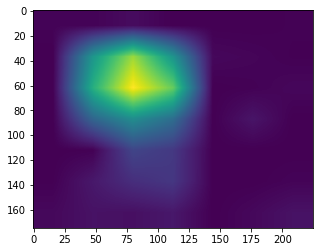

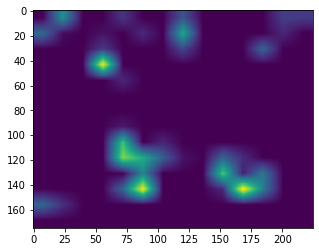

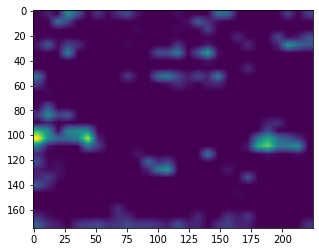

In [8]:
grad_cam_image = generate_grad_cam(cam_model, 'conv5_block3_out', item)
plt.imshow(grad_cam_image)
plt.show()

grad_cam_image = generate_grad_cam(cam_model, 'conv4_block3_out', item)
plt.imshow(grad_cam_image)
plt.show()

grad_cam_image = generate_grad_cam(cam_model, 'conv3_block3_out', item)
plt.imshow(grad_cam_image)
plt.show()

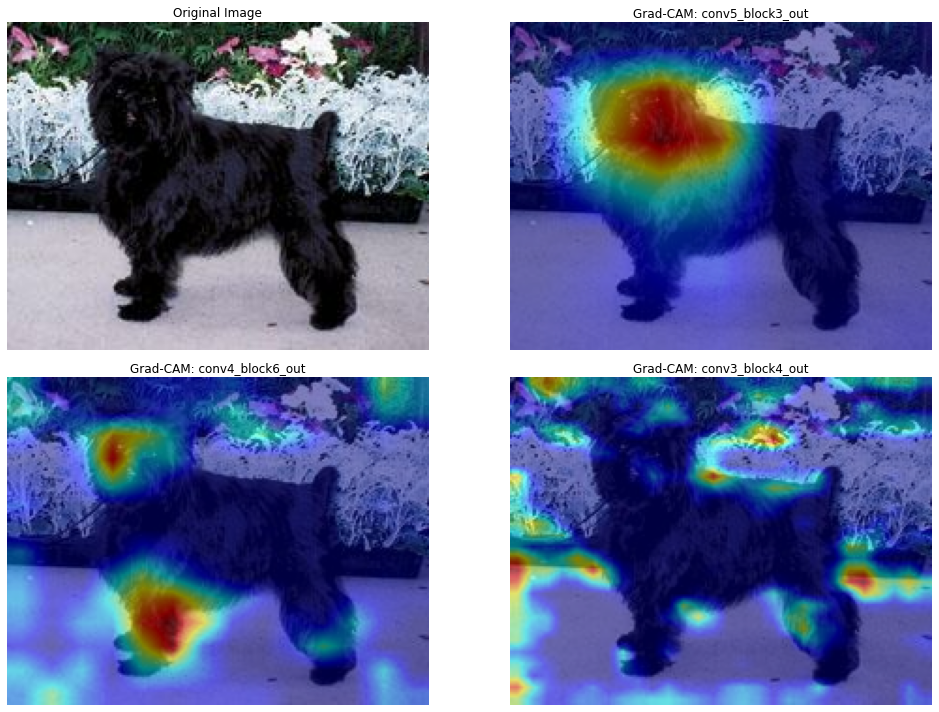

In [9]:
# 시각화할 레이어 목록
layers_to_visualize = [
    'conv5_block3_out',  # 마지막 합성곱 블록
    'conv4_block6_out',  # 중간 합성곱 블록
    'conv3_block4_out'   # 초기 합성곱 블록
]

# 원본 이미지 준비
origin_image = item['image'].astype(np.uint8)

# 각 레이어에 대한 Grad-CAM 생성 및 시각화
plt.figure(figsize=(15, 10))

# 원본 이미지 표시
plt.subplot(2, 2, 1)
plt.imshow(origin_image)
plt.title('Original Image')
plt.axis('off')

# 각 레이어의 Grad-CAM 생성 및 표시
for i, layer_name in enumerate(layers_to_visualize):
    # Grad-CAM 생성
    grad_cam = generate_grad_cam(cam_model, layer_name, item)
    
    # Grad-CAM 시각화
    grad_cam_image = np.uint8(grad_cam * 255)
    grad_cam_colored = visualize_cam_on_image(grad_cam_image, origin_image)
    
    # 결과 표시
    plt.subplot(2, 2, i+2)
    plt.imshow(grad_cam_colored)
    plt.title(f'Grad-CAM: {layer_name}')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### 바운딩 박스 구하기
---
1. 제시된 코드를 참고해, 직접 Grad-CAM으로 얻은 CAM을 통해서 바운딩 박스를 얻어보세요.
2. 1)에서 얻은 바운딩 박스를 시각화해 보세요.

100


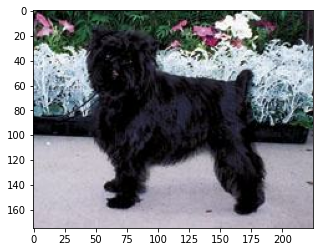

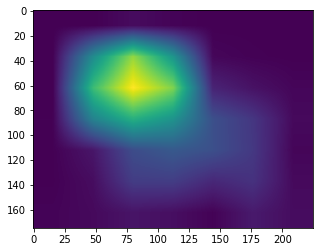

슝=3


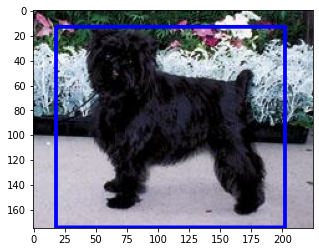

In [10]:
item = get_one(ds_test)
print(item['label'])
plt.imshow(item['image'])
plt.show()

cam_image = generate_cam(cam_model, item)
plt.imshow(cam_image)
plt.show()

def get_bbox(cam_image, score_thresh=0.05):
    low_indicies = cam_image <= score_thresh
    cam_image[low_indicies] = 0
    cam_image = (cam_image*255).astype(np.uint8)
    
    contours,_ = cv2.findContours(cam_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    rotated_rect = cv2.minAreaRect(cnt)
    rect = cv2.boxPoints(rotated_rect)
    rect = np.int0(rect)
    return rect

print('슝=3')

rect = get_bbox(cam_image)
rect

image = copy.deepcopy(item['image'])
image = cv2.drawContours(image, [rect], 0, (0,0,255), 2)
plt.imshow(image)
plt.show()

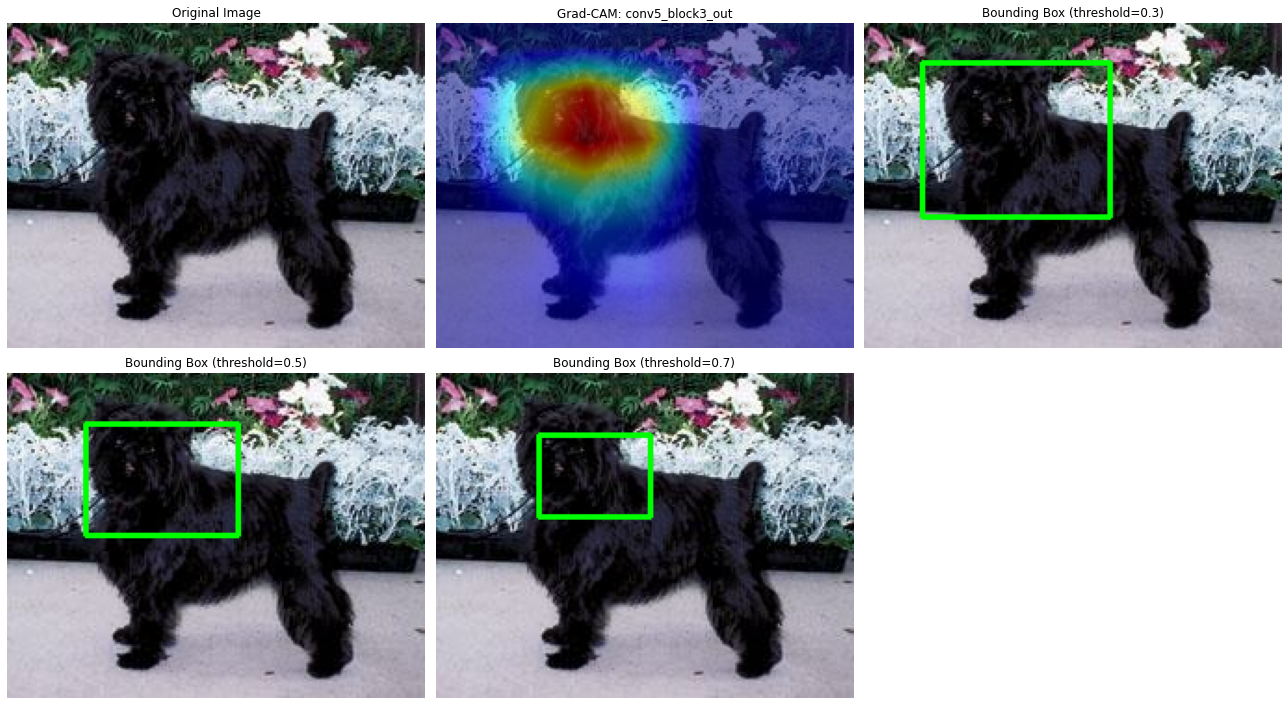

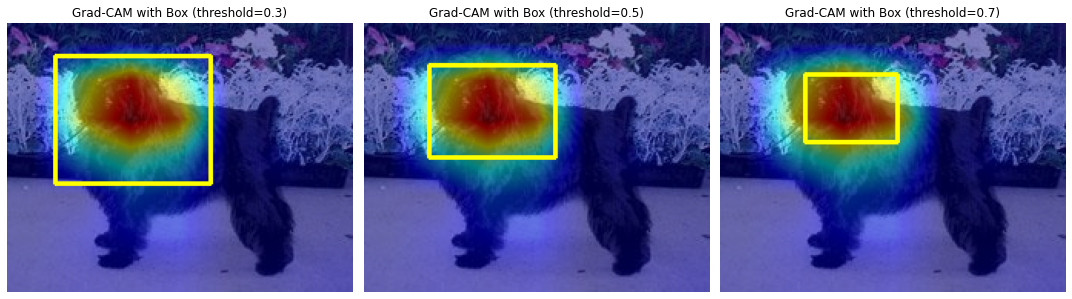

In [11]:
def get_bounding_box_from_cam(cam_image, threshold=0.5):
    """
    CAM 이미지에서 바운딩 박스 좌표를 추출합니다.
    
    Args:
        cam_image: 0-1 범위의 Grad-CAM 이미지
        threshold: 관심 영역으로 간주할 임계값 (0-1 사이)
        
    Returns:
        x, y, w, h: 바운딩 박스 좌표 (x, y는 좌상단 지점, w, h는 너비와 높이)
    """
    # CAM 이미지를 임계값 기준으로 이진화
    binary_map = (cam_image > threshold).astype(np.uint8) * 255
    
    # 연결된 영역 찾기
    contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 연결된 영역이 없으면 기본값 반환
    if not contours:
        return 0, 0, cam_image.shape[1], cam_image.shape[0]
    
    # 가장 큰 연결 영역 찾기
    max_contour = max(contours, key=cv2.contourArea)
    
    # 바운딩 박스 계산
    x, y, w, h = cv2.boundingRect(max_contour)
    
    return x, y, w, h

def visualize_bounding_box(image, x, y, w, h, color=(0, 255, 0), thickness=2):
    """
    이미지에 바운딩 박스를 그립니다.
    
    Args:
        image: 바운딩 박스를 그릴 이미지
        x, y, w, h: 바운딩 박스 좌표
        color: 박스 색상 (B, G, R)
        thickness: 선 두께
        
    Returns:
        boxed_image: 바운딩 박스가 그려진 이미지
    """
    # 이미지 복사본 생성
    boxed_image = image.copy()
    
    # 바운딩 박스 그리기
    cv2.rectangle(boxed_image, (x, y), (x+w, y+h), color, thickness)
    
    return boxed_image

# 테스트할 레이어 선택
layer_name = 'conv5_block3_out'

# 원본 이미지 준비
origin_image = item['image'].astype(np.uint8)

# Grad-CAM 생성
grad_cam = generate_grad_cam(cam_model, layer_name, item)

# 바운딩 박스 추출 (여러 임계값 테스트)
thresholds = [0.3, 0.5, 0.7]

# 서브플롯 레이아웃 설정 (2행 3열)
plt.figure(figsize=(18, 10))

# 원본 이미지 표시
plt.subplot(2, 3, 1)
plt.imshow(origin_image)
plt.title('Original Image')
plt.axis('off')

# Grad-CAM 히트맵 표시
plt.subplot(2, 3, 2)
grad_cam_colored = visualize_cam_on_image(np.uint8(grad_cam * 255), origin_image)
plt.imshow(grad_cam_colored)
plt.title(f'Grad-CAM: {layer_name}')
plt.axis('off')

# 다양한 임계값으로 바운딩 박스 시각화
for i, threshold in enumerate(thresholds):
    # 바운딩 박스 추출
    x, y, w, h = get_bounding_box_from_cam(grad_cam, threshold=threshold)
    
    # 바운딩 박스 시각화
    boxed_image = visualize_bounding_box(origin_image, x, y, w, h)
    
    # 결과 표시
    plt.subplot(2, 3, i+3)
    plt.imshow(boxed_image)
    plt.title(f'Bounding Box (threshold={threshold})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# 히트맵과 바운딩 박스를 함께 표시
plt.figure(figsize=(15, 5))

for i, threshold in enumerate(thresholds):
    # 바운딩 박스 추출
    x, y, w, h = get_bounding_box_from_cam(grad_cam, threshold=threshold)
    
    # 히트맵에 바운딩 박스 표시
    cam_with_box = visualize_bounding_box(grad_cam_colored, x, y, w, h, color=(255, 255, 0))
    
    # 결과 표시
    plt.subplot(1, 3, i+1)
    plt.imshow(cam_with_box)
    plt.title(f'Grad-CAM with Box (threshold={threshold})')
    plt.axis('off')

plt.tight_layout()
plt.show()

#### IoU 구하기
---
1. 정답 바운딩 박스(ground truth) 와 예측값 바운딩 박스(prediction box) 두 가지를 이용해서 IoU를 계산하는 get_iou() 함수를 만들어 주세요.
```
def get_iou(gt_bbox, pred_bbox):
    iou = None
    # TODO: get iou between two bbox
    return iou
```
2. CAM과 Grad-CAM으로 얻은 바운딩 박스와 정답 바운딩 박스와의 IoU를 각각 비교해 봅시다.

In [12]:
# rect의 좌표는 (x, y) 형태로, bbox는 (y_min, x_min, y_max, x_max)의 normalized 형태로 주어집니다. 
def rect_to_minmax(rect, image):
    bbox = [
        rect[:,1].min()/float(image.shape[0]),  #bounding box의 y_min
        rect[:,0].min()/float(image.shape[1]),  #bounding box의 x_min
        rect[:,1].max()/float(image.shape[0]), #bounding box의 y_max
        rect[:,0].max()/float(image.shape[1]) #bounding box의 x_max
    ]
    return bbox

print('슝=3')

pred_bbox = rect_to_minmax(rect, item['image'])
pred_bbox

item['objects']['bbox']

def get_iou(boxA, boxB):
    y_min = max(boxA[0], boxB[0])
    x_min= max(boxA[1], boxB[1])
    y_max = min(boxA[2], boxB[2])
    x_max = min(boxA[3], boxB[3])
    
    interArea = max(0, x_max - x_min) * max(0, y_max - y_min)
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

print('슝=3')

get_iou(pred_bbox, item['objects']['bbox'][0])

슝=3
슝=3


0.7799082032505189

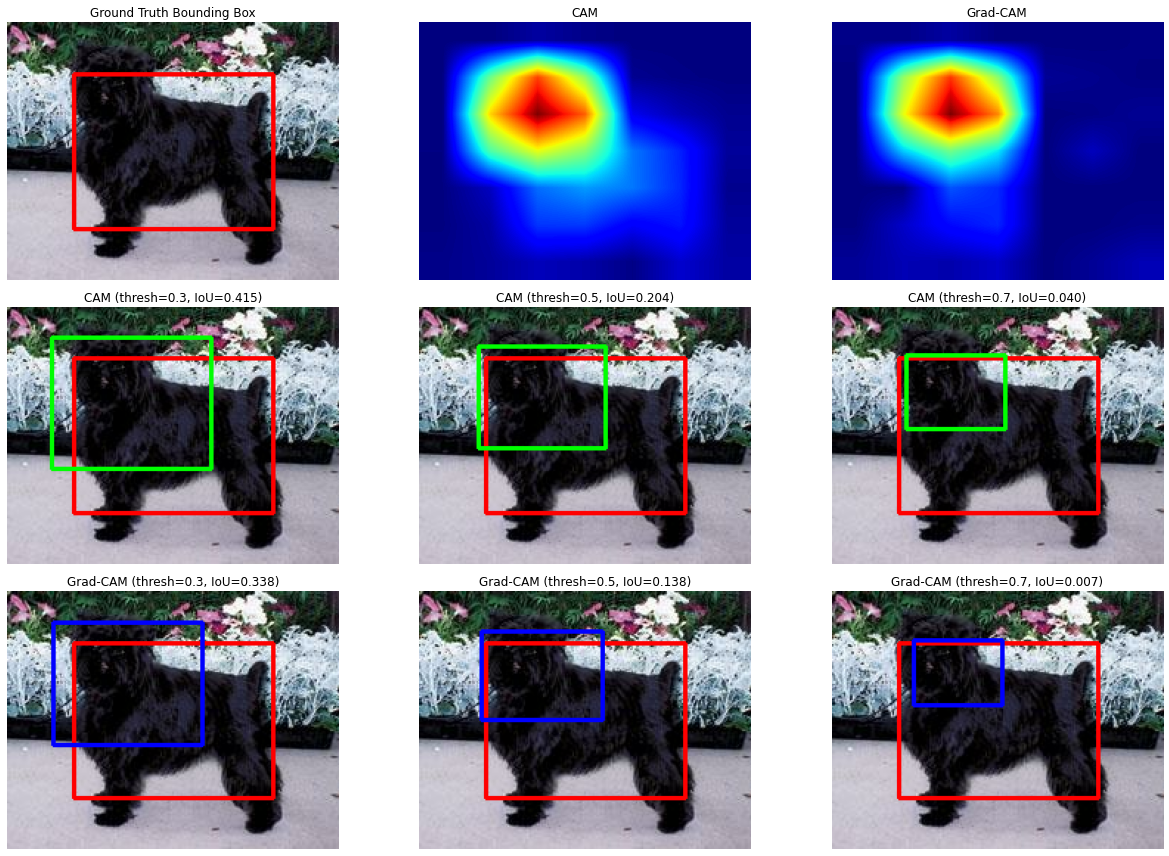


===== IoU 결과 요약 =====
임계값	 CAM IoU	 Grad-CAM IoU
----------------------------------------
0.3	 0.4148		 0.3380
0.5	 0.2039		 0.1382
0.7	 0.0403		 0.0071


In [13]:
# 정답 바운딩 박스 가정 (실제로는 데이터셋에서 가져와야 함)
# 예시: 이미지의 중앙 부분에 객체가 있다고 가정
def get_ground_truth_bbox(image_shape):
    """이미지 중앙에 위치한 가상의 정답 바운딩 박스 생성"""
    height, width = image_shape[:2]
    
    # 이미지 중앙의 60% 영역을 차지한다고 가정
    x = int(width * 0.2)
    y = int(height * 0.2)
    w = int(width * 0.6)
    h = int(height * 0.6)
    
    return [x, y, w, h]

# 원본 이미지 준비
origin_image = item['image'].astype(np.uint8)
image_shape = origin_image.shape

# 정답 바운딩 박스 추출 (실제로는 데이터셋에서 가져와야 함)
gt_bbox = get_ground_truth_bbox(image_shape)

# CAM과 Grad-CAM 비교를 위한 레이어 및 임계값 설정
layer_name = 'conv5_block3_out'
thresholds = [0.3, 0.5, 0.7]

# 1. CAM 생성 및 바운딩 박스 추출
cam_image = generate_cam(cam_model, item)
cam_bbox_results = []

for threshold in thresholds:
    # CAM 바운딩 박스 추출
    cam_bbox = get_bounding_box_from_cam(cam_image, threshold)
    # IoU 계산
    cam_iou = get_iou(gt_bbox, cam_bbox)
    cam_bbox_results.append((threshold, cam_bbox, cam_iou))

# 2. Grad-CAM 생성 및 바운딩 박스 추출
grad_cam = generate_grad_cam(cam_model, layer_name, item)
grad_cam_bbox_results = []

for threshold in thresholds:
    # Grad-CAM 바운딩 박스 추출
    grad_cam_bbox = get_bounding_box_from_cam(grad_cam, threshold)
    # IoU 계산
    grad_cam_iou = get_iou(gt_bbox, grad_cam_bbox)
    grad_cam_bbox_results.append((threshold, grad_cam_bbox, grad_cam_iou))

# 결과 시각화
plt.figure(figsize=(18, 12))

# 원본 이미지에 정답 바운딩 박스 표시
plt.subplot(3, 3, 1)
gt_boxed_image = visualize_bounding_box(origin_image, *gt_bbox, color=(255, 0, 0), thickness=2)
plt.imshow(gt_boxed_image)
plt.title('Ground Truth Bounding Box')
plt.axis('off')

# CAM 결과 표시
plt.subplot(3, 3, 2)
plt.imshow(cam_image, cmap='jet')
plt.title('CAM')
plt.axis('off')

# Grad-CAM 결과 표시
plt.subplot(3, 3, 3)
plt.imshow(grad_cam, cmap='jet')
plt.title('Grad-CAM')
plt.axis('off')

# CAM 바운딩 박스 결과 표시
for i, (threshold, cam_bbox, cam_iou) in enumerate(cam_bbox_results):
    # 정답 바운딩 박스(빨강)와 CAM 바운딩 박스(초록) 함께 표시
    img_with_boxes = visualize_bounding_box(origin_image.copy(), *gt_bbox, color=(255, 0, 0), thickness=2)
    img_with_boxes = visualize_bounding_box(img_with_boxes, *cam_bbox, color=(0, 255, 0), thickness=2)
    
    plt.subplot(3, 3, 4+i)
    plt.imshow(img_with_boxes)
    plt.title(f'CAM (thresh={threshold}, IoU={cam_iou:.3f})')
    plt.axis('off')

# Grad-CAM 바운딩 박스 결과 표시
for i, (threshold, grad_cam_bbox, grad_cam_iou) in enumerate(grad_cam_bbox_results):
    # 정답 바운딩 박스(빨강)와 Grad-CAM 바운딩 박스(파랑) 함께 표시
    img_with_boxes = visualize_bounding_box(origin_image.copy(), *gt_bbox, color=(255, 0, 0), thickness=2)
    img_with_boxes = visualize_bounding_box(img_with_boxes, *grad_cam_bbox, color=(0, 0, 255), thickness=2)
    
    plt.subplot(3, 3, 7+i)
    plt.imshow(img_with_boxes)
    plt.title(f'Grad-CAM (thresh={threshold}, IoU={grad_cam_iou:.3f})')
    plt.axis('off')

plt.tight_layout()
plt.show()

# IoU 결과 요약 출력
print("\n===== IoU 결과 요약 =====")
print("임계값\t CAM IoU\t Grad-CAM IoU")
print("-" * 40)
for i, threshold in enumerate(thresholds):
    cam_iou = cam_bbox_results[i][2]
    grad_cam_iou = grad_cam_bbox_results[i][2]
    print(f"{threshold}\t {cam_iou:.4f}\t\t {grad_cam_iou:.4f}")

#### 회고
- CAM이나 Grad-CAM을 직접 구현해 보진 않았지만, 예제 코드를 최대한 보지 않고 작성하는데 설명과 이론을 알아도 쉽지 않았음 (기존 코드에 적용)
- 예제 코드는 간결하고 직관적이고 보다 절차적인 접근 방식을 사용하는 편인 것 같고, 구현된 코드는 함수형 접근 방식으로 각 단계를 별도로 처리함
```
img_tensor, class_idx = normalize_and_resize_img(item)
...
loss = pred[:, class_idx] # 원하는 class(여기서는 정답으로 활용) 예측값
```
- Grad-CAM에서 예제 코드로 아래와 같이 loss 변수의 이름은 의미적으로 정확하지 않고, 특정 클래스의 신뢰도를 실제로 측정하므로 score가 의미적으로 더 정확함